Time series is a series of data points indexed in time order.Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.

Time series analysis comprises method of analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('international-airline-passengers.csv',header=None)


In [3]:
df.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.isnull().sum()

0    0
1    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       144 non-null    object
 1   1       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.shape

(144, 2)

In [7]:
df.columns = ['year','passengers']


In [8]:
df.head()

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
df['year'].min(),df['year'].max()

('1949-01', '1960-12')

In [10]:
df['year'] = pd.to_datetime(df['year'], format='%Y-%m')

In [11]:
df['year'].head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: year, dtype: datetime64[ns]

In [12]:
y = df.set_index('year')

In [13]:
y.head()

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


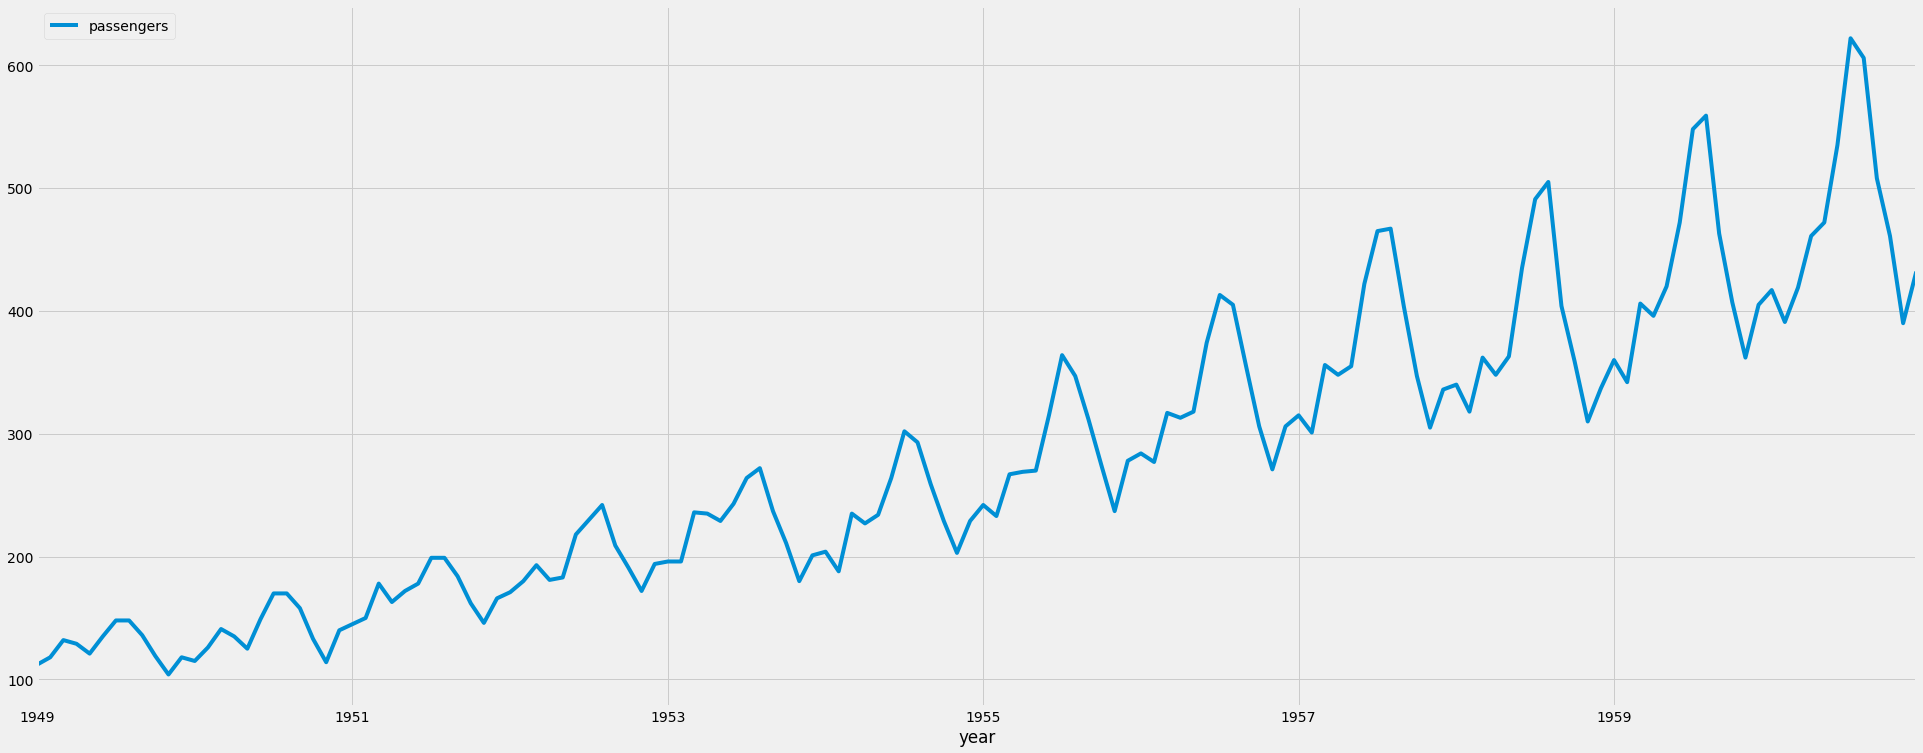

In [14]:
y.plot(figsize=(30, 12))
plt.show()

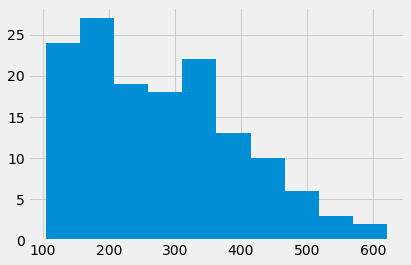

In [15]:
y['passengers'].hist()

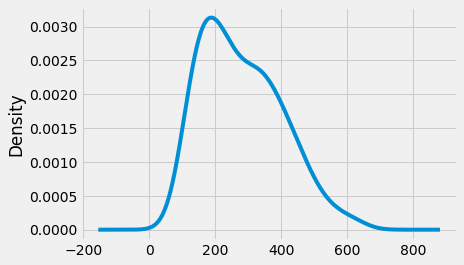

In [16]:
y['passengers'].plot(kind = 'kde')

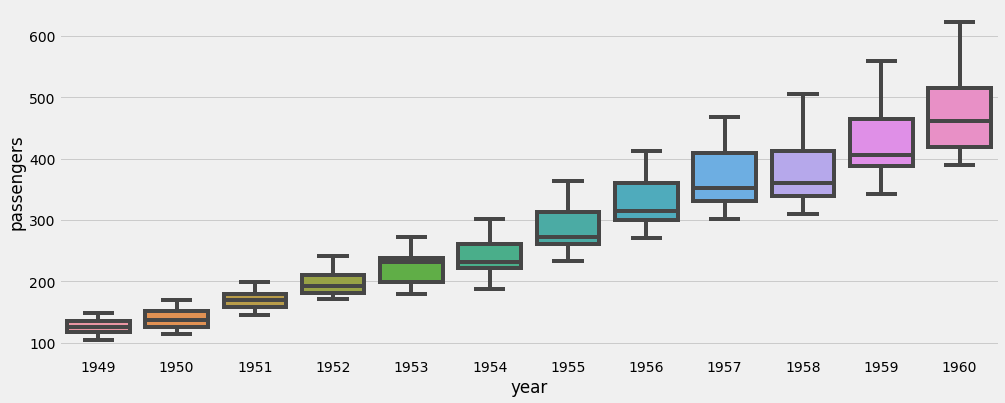

In [17]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(y.passengers.index.year, y.passengers, ax=ax)

In [18]:
#the median values shows an upward trend
#next decomposing using statsmodel to see trend,
#seasonal and residual componenets of our data

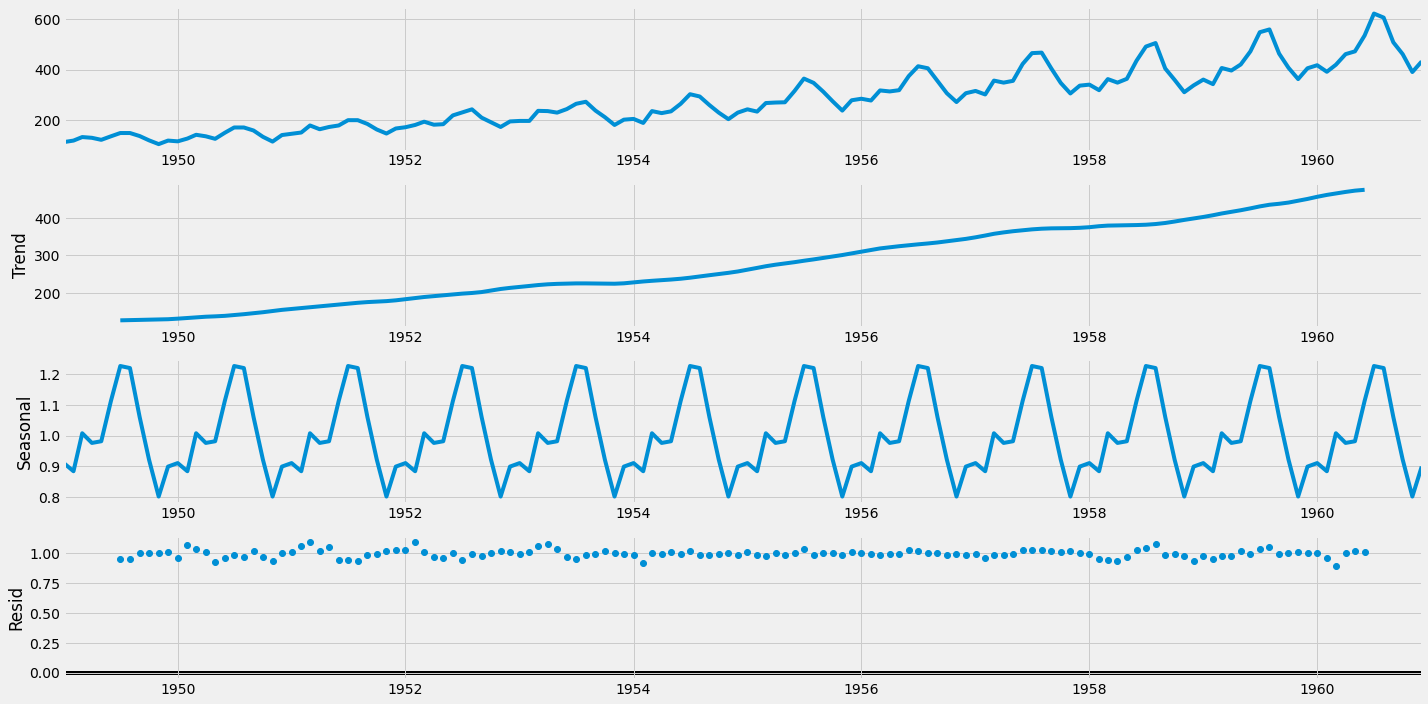

In [19]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

Stationarity

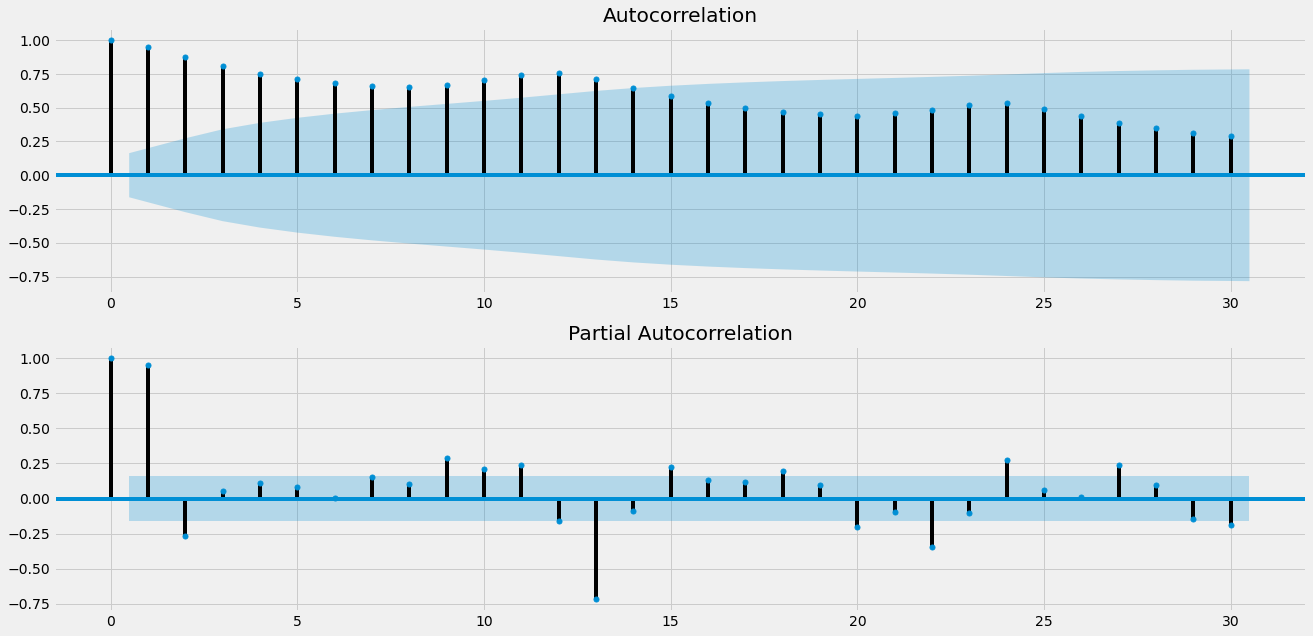

In [20]:
#ACF and PACF plots

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.passengers, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.passengers, ax=pyplot.gca(), lags = 30)
pyplot.show()

In [21]:
#Rolling Statistics¶

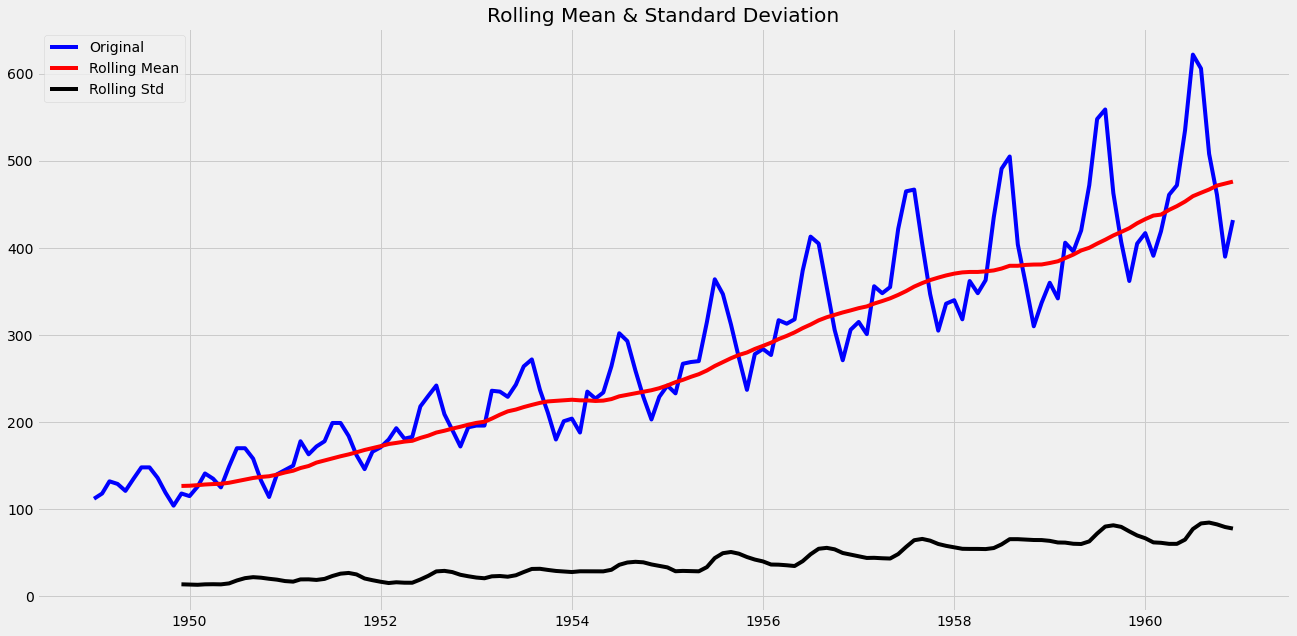

In [22]:
#Determing rolling statistics
rolmean = y.rolling(12).mean()

rolstd = y.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [23]:
#rolling mean and Standard deviation are not constant with respect to time (increasing trend)
#not stationary

In [24]:
from statsmodels.tsa.stattools import adfuller


In [25]:
dftest = adfuller(y, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [26]:
#a very low p-value will indicate stationarity

In [27]:
#log scale transformation
ts_log = np.log(y)

In [28]:
ts_log

,passengers
year,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


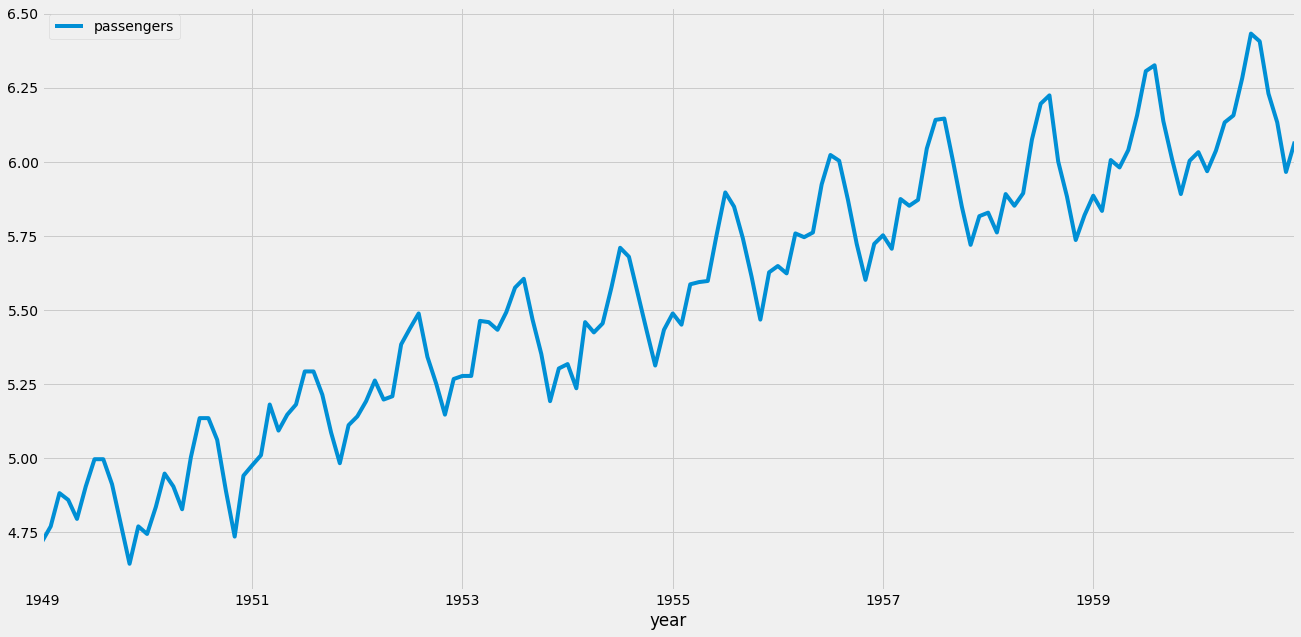

In [29]:
ts_log.plot()
plt.show()

In [30]:
#Making Time Series Stationary
#Smoothing to remove trend
#1. Moving average

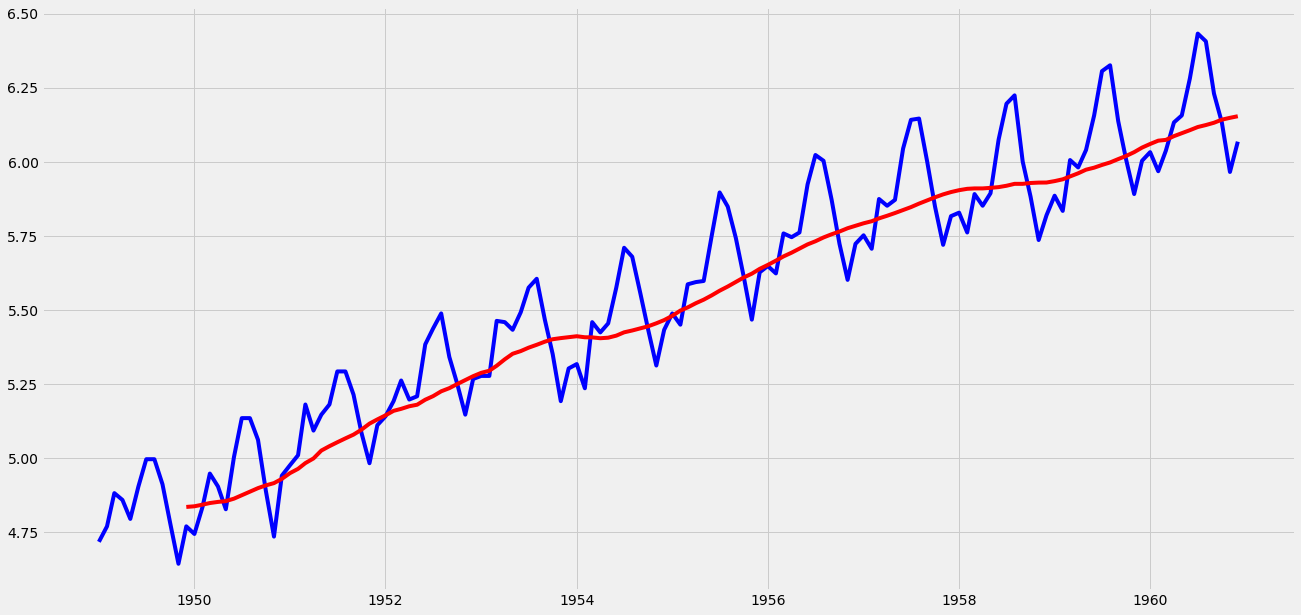

In [31]:
mov_avg = ts_log.rolling(12).mean()

#Plot rolling statistics:
plt.plot(ts_log, color='blue',label='Original')
plt.plot(mov_avg, color='red',label='moving average')

In [32]:
ts_log_moving_avg_diff = ts_log.passengers - mov_avg.passengers
ts_log_moving_avg_diff.head(12)

year
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: passengers, dtype: float64

In [33]:
ts_log_moving_avg_diff.dropna(inplace=True)


In [34]:
ts_log_moving_avg_diff

year
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: passengers, Length: 133, dtype: float64

In [35]:
def test_stationarity(ser):
    #Determing rolling statistics
    rolmean = ser.rolling(12).mean()

    rolstd = ser.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(ser, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    dftest = adfuller(ser, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

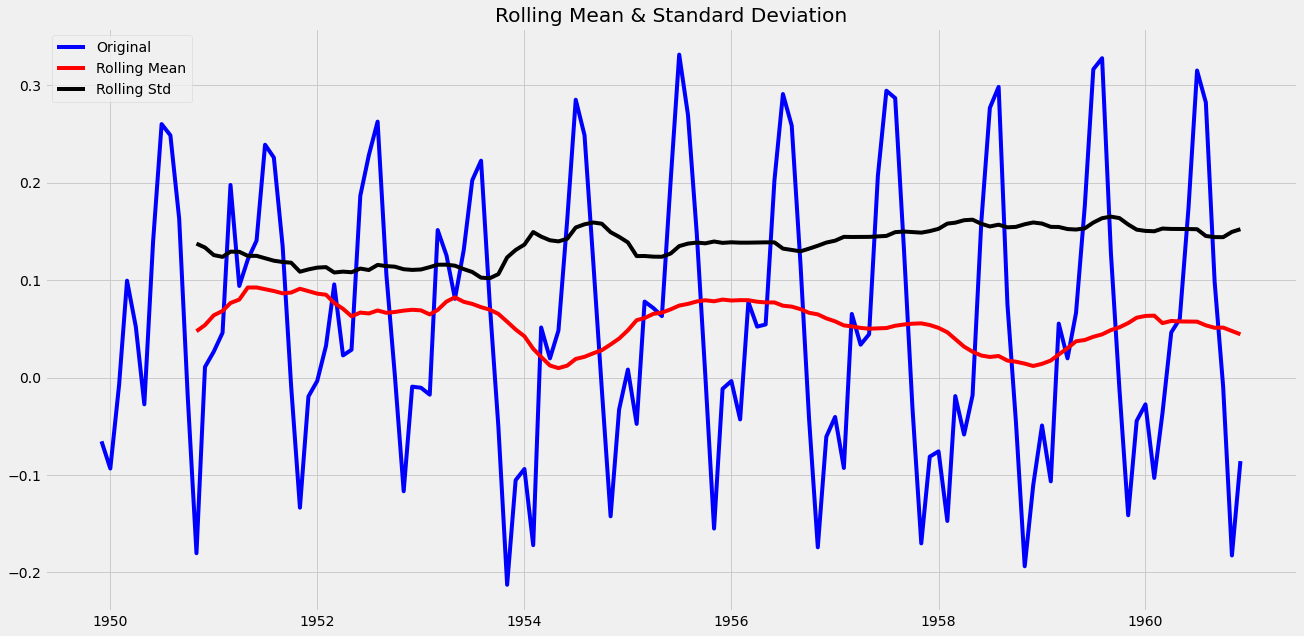

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [36]:
test_stationarity(ts_log_moving_avg_diff)

In [37]:
#2. Exponentially weighted moving average

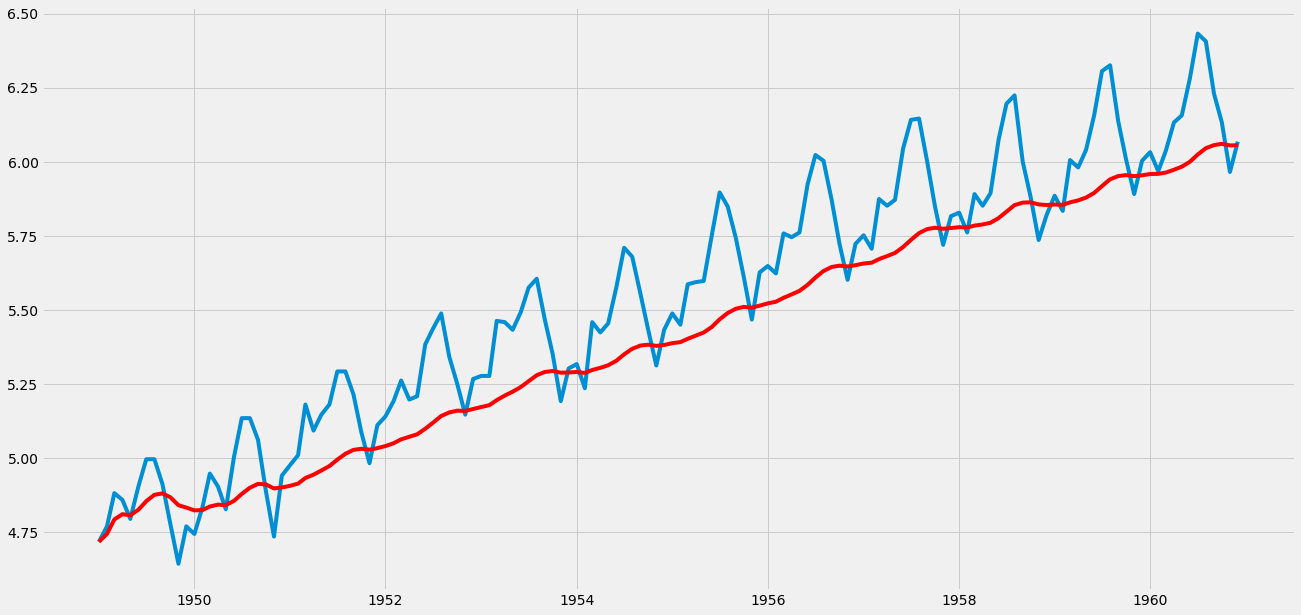

In [38]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

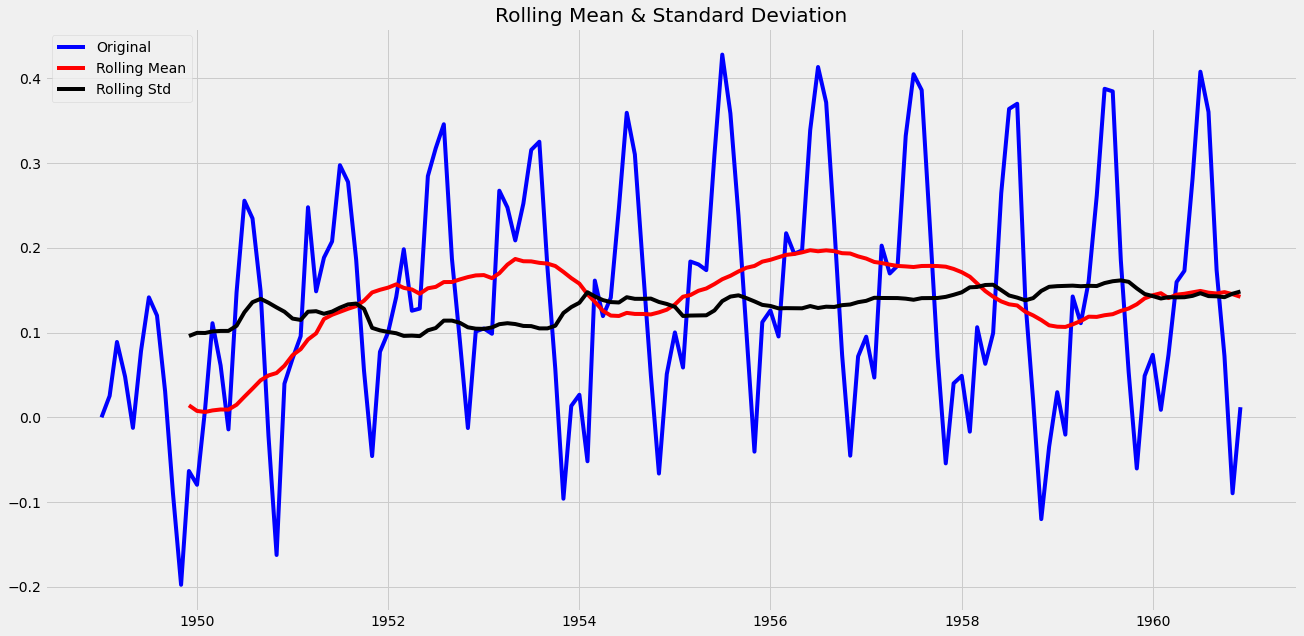

Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [39]:
ts_log_ewma_diff = ts_log.passengers - expwighted_avg.passengers
test_stationarity(ts_log_ewma_diff)


In [40]:
#Differencing

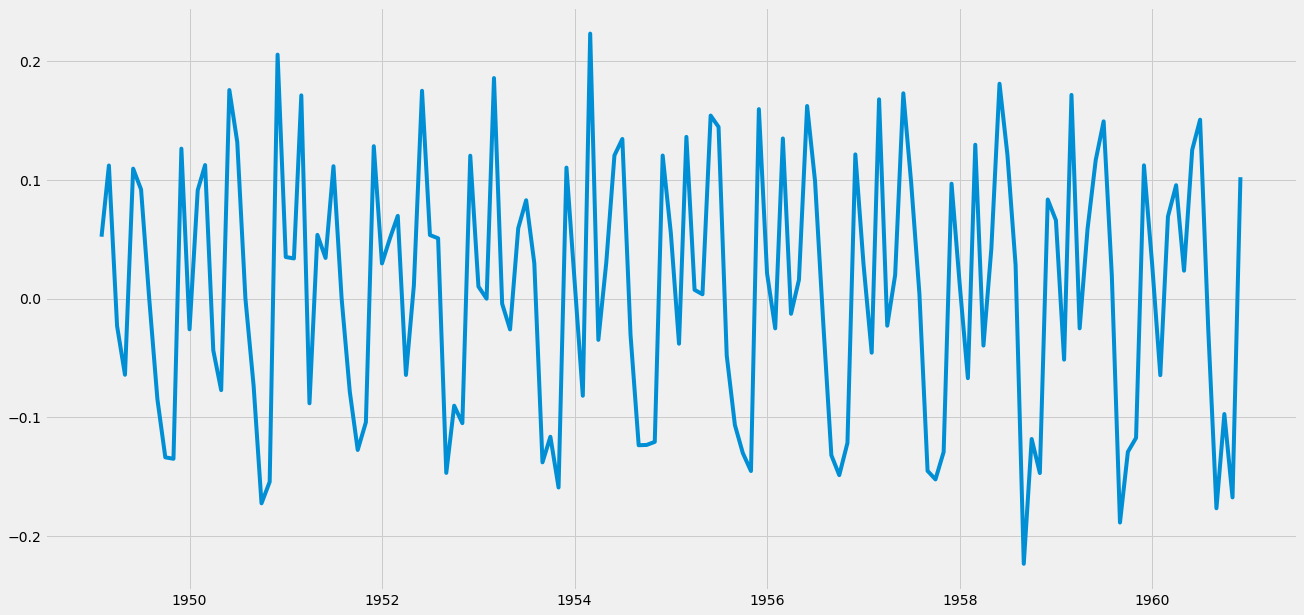

In [41]:
ts_log_diff = ts_log.passengers - ts_log.passengers.shift()
plt.plot(ts_log_diff)

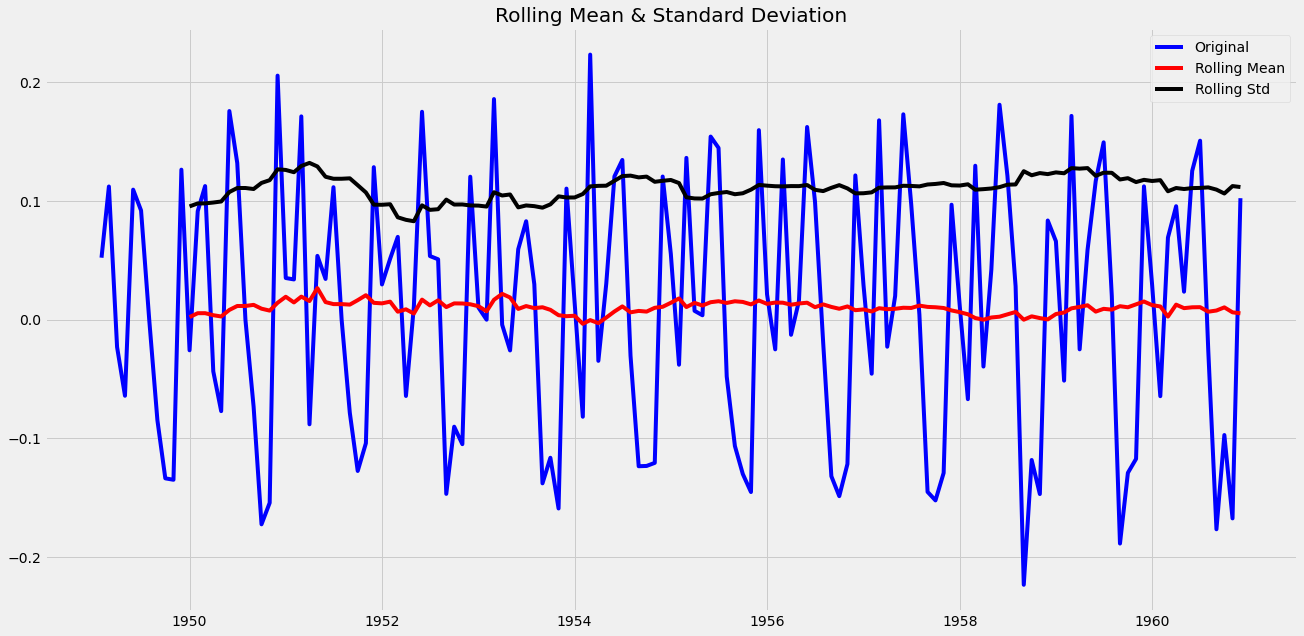

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [42]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [43]:
#Decomposition

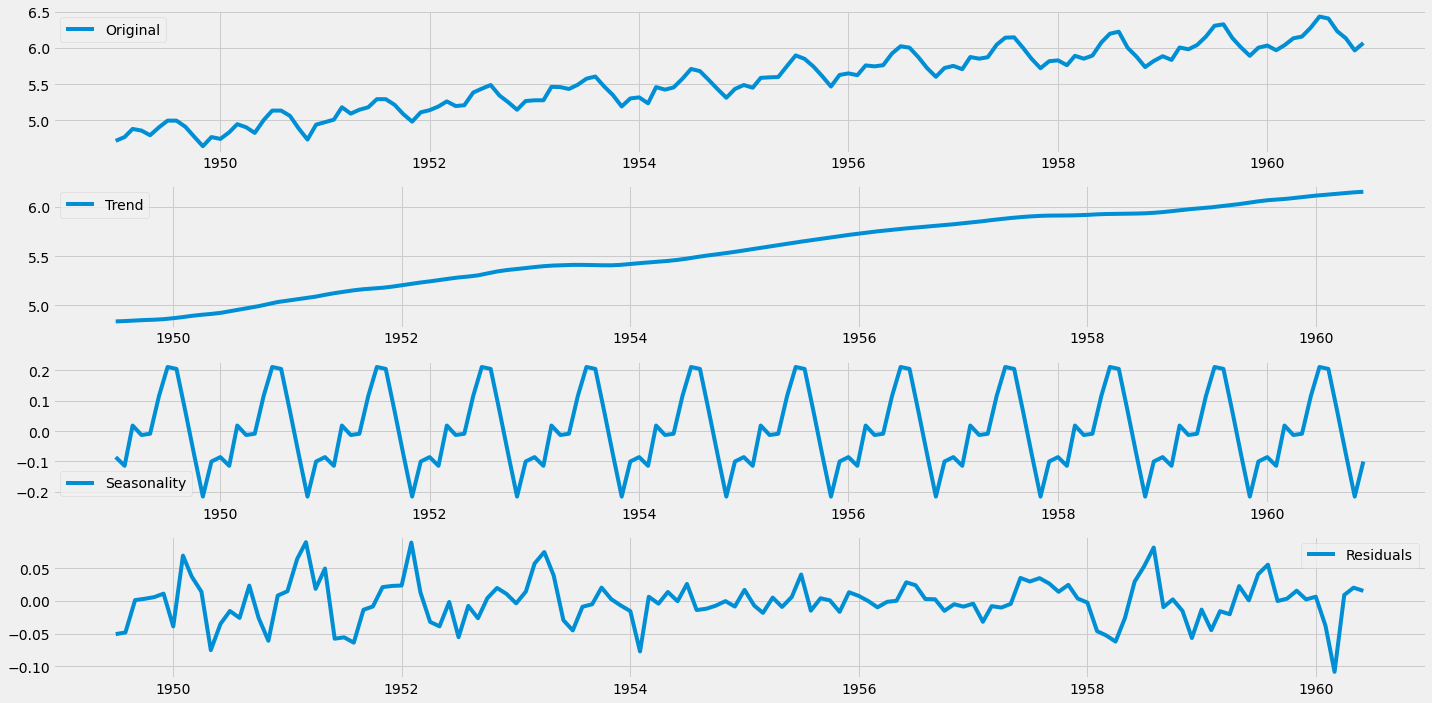

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

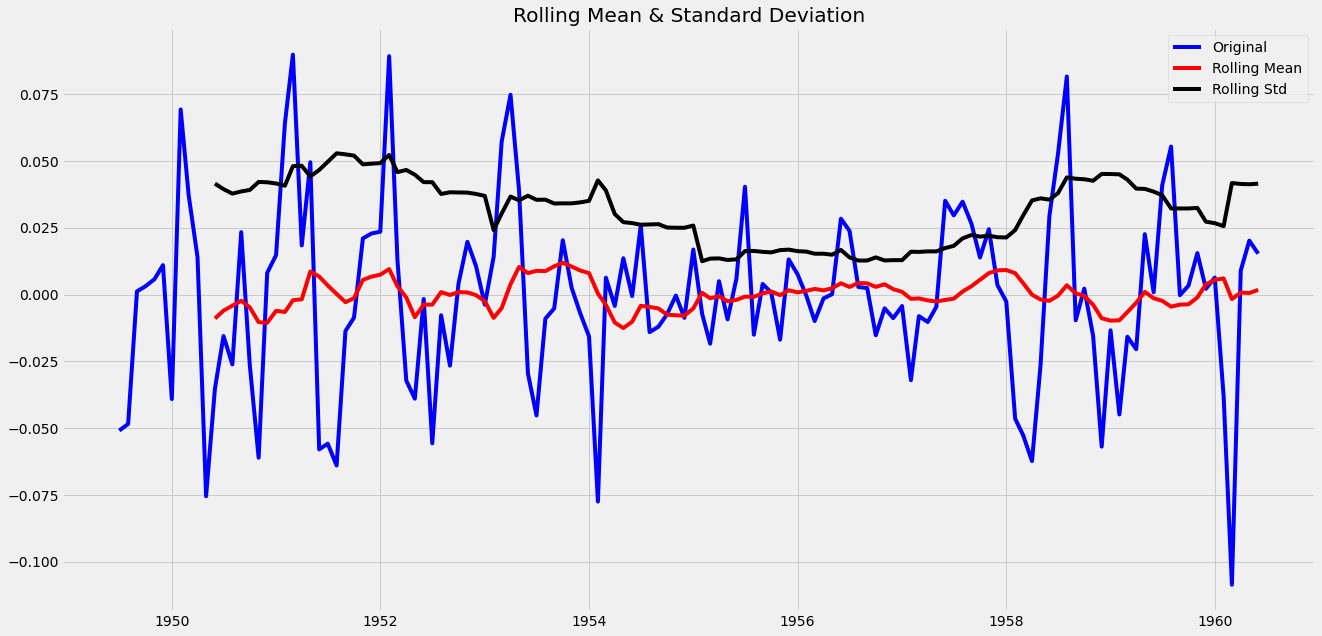

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [45]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [46]:
##TIMESERIES FORECASTING

In [47]:
#1. AR(Auto regression)

In [48]:
from statsmodels.tsa.ar_model import AR
from random import random

In [49]:
#fit differencing of log transformation

In [50]:
model = AR(ts_log_diff)
model_fit = model.fit()

/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


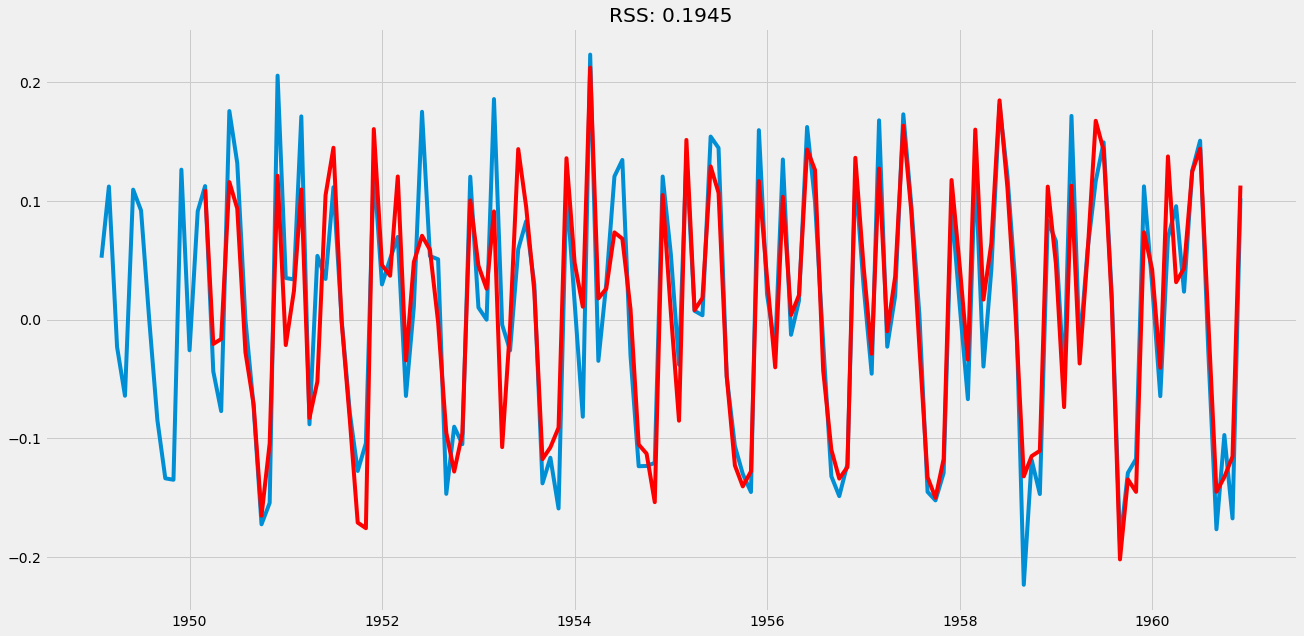

In [51]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.show()

In [52]:
#predicted values
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

year
1950-03-01    0.109713
1950-04-01   -0.020423
1950-05-01   -0.016243
1950-06-01    0.115842
1950-07-01    0.093564
dtype: float64


In [53]:
#reversing transformations
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

year
1950-03-01    0.109713
1950-04-01    0.089291
1950-05-01    0.073048
1950-06-01    0.188891
1950-07-01    0.282455
dtype: float64


In [54]:
ts_log.passengers.iloc[0]

4.718498871295094

In [55]:
predictions_ARIMA_log = pd.Series(ts_log.passengers.iloc[0], index=ts_log.index)


In [56]:
predictions_ARIMA_log

year
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
                ...   
1960-08-01    4.718499
1960-09-01    4.718499
1960-10-01    4.718499
1960-11-01    4.718499
1960-12-01    4.718499
Length: 144, dtype: float64

In [57]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log


year
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
                ...   
1960-08-01    6.230226
1960-09-01    6.085368
1960-10-01    5.952885
1960-11-01    5.837732
1960-12-01    5.950643
Length: 144, dtype: float64

Text(0.5, 1.0, 'RMSE: 78.5144')

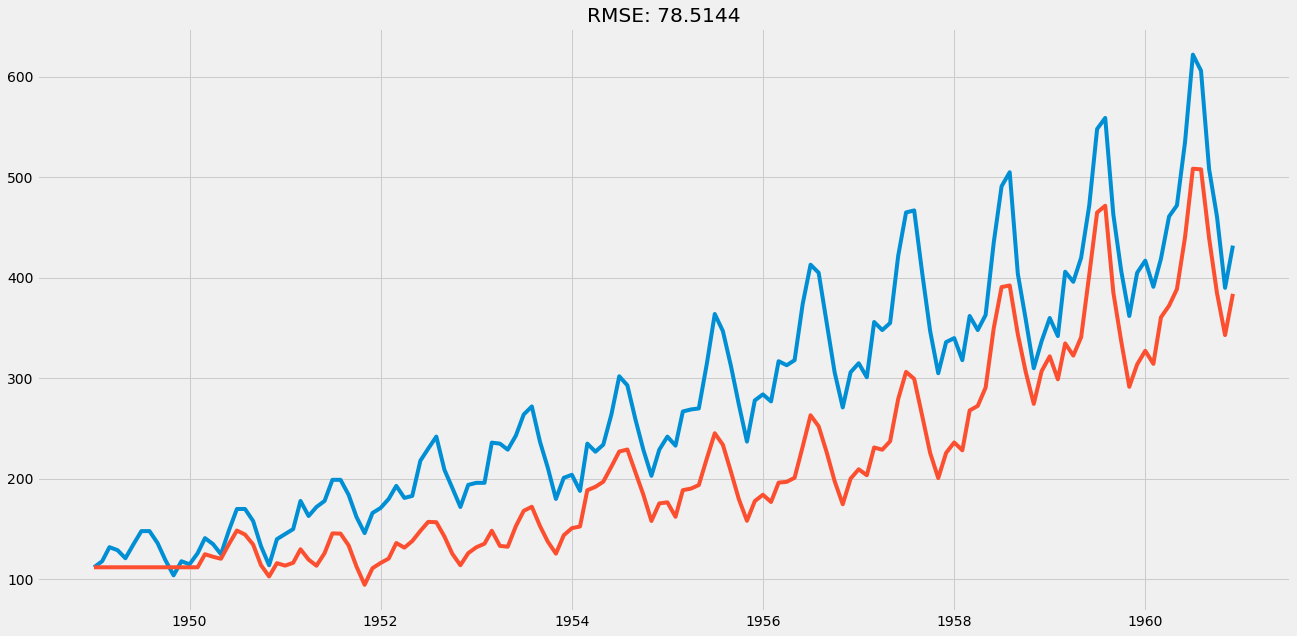

In [58]:
#to reverse log transform
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(y)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA-y.passengers)**2)/len(y.passengers)))

In [59]:
#error metrics

In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [61]:
r2_score(y.passengers, predictions_ARIMA)


0.5686734896130741

In [62]:
mean_absolute_error(y.passengers, predictions_ARIMA)


69.42862838872749

In [63]:
median_absolute_error(y.passengers, predictions_ARIMA)


69.36695435384767

In [64]:
mean_squared_error(y.passengers, predictions_ARIMA)


6164.506983577633

In [65]:
mean_squared_log_error(y.passengers, predictions_ARIMA)


0.09945599448249766

In [66]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [67]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame(
        {'r2_score':r2_score(y, pred),}, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [68]:
evaluate_forecast(y.passengers, predictions_ARIMA)


,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.568673,69.428628,69.366954,6164.506984,0.099456,24.472405,78.514374


In [69]:
#MOVING AVERAGE

In [70]:
from statsmodels.tsa.arima_model import ARMA
from random import random

In [71]:
# fit model
model = ARMA(ts_log_diff, order=(0, 1))
model_fit = model.fit(disp=False)

/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [72]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             passengers   No. Observations:                  143
Model:                     ARMA(0, 1)   Log Likelihood                 121.754
Method:                       css-mle   S.D. of innovations              0.103
Date:                Thu, 02 Jul 2020   AIC                           -237.507
Time:                        16:36:03   BIC                           -228.619
Sample:                    02-01-1949   HQIC                          -233.895
                         - 12-01-1960                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0097      0.011      0.887      0.375      -0.012       0.031
ma.L1.passengers     0.2722      0.095      2.873      0.004       0.086       0.458
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.6744           +0.0000j            3.6744            0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 1.5245')

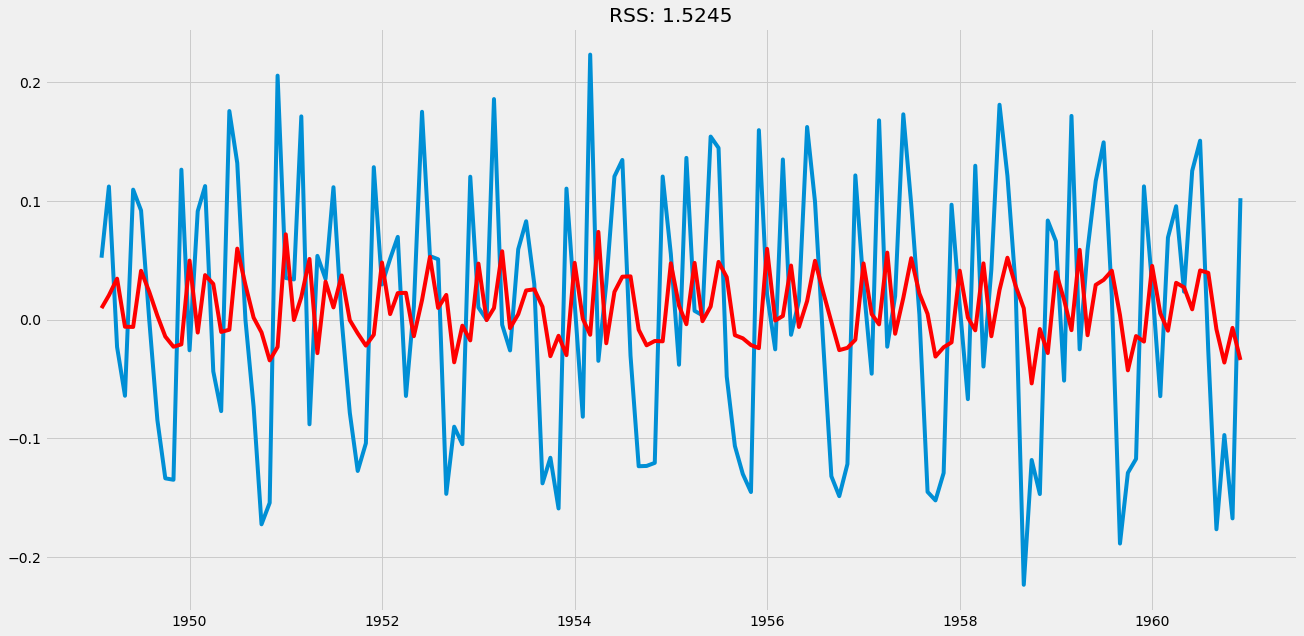

In [73]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

In [74]:
#Autoregressive moving average(ARMA)

In [75]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(ts_log_diff, order=(2, 1))
model_fit = model.fit(disp=False)

/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [76]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             passengers   No. Observations:                  143
Model:                     ARMA(2, 1)   Log Likelihood                 140.076
Method:                       css-mle   S.D. of innovations              0.090
Date:                Thu, 02 Jul 2020   AIC                           -270.151
Time:                        16:36:04   BIC                           -255.337
Sample:                    02-01-1949   HQIC                          -264.131
                         - 12-01-1960                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0101      0.000     23.507      0.000       0.009       0.011
ar.L1.passengers     0.9983      0.076     13.163      0.000       0.850       1.147
ar.L2.passengers    -0.4134      0.077     -5.384      0.000      -0.564      -0.263
ma.L1.passengers    -0.9999      0.028    -35.278      0.000      -1.055      -0.944
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2073           -0.9804j            1.5552           -0.1086
AR.2            1.2073           +0.9804j            1.5552            0.1086
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 1.1753')

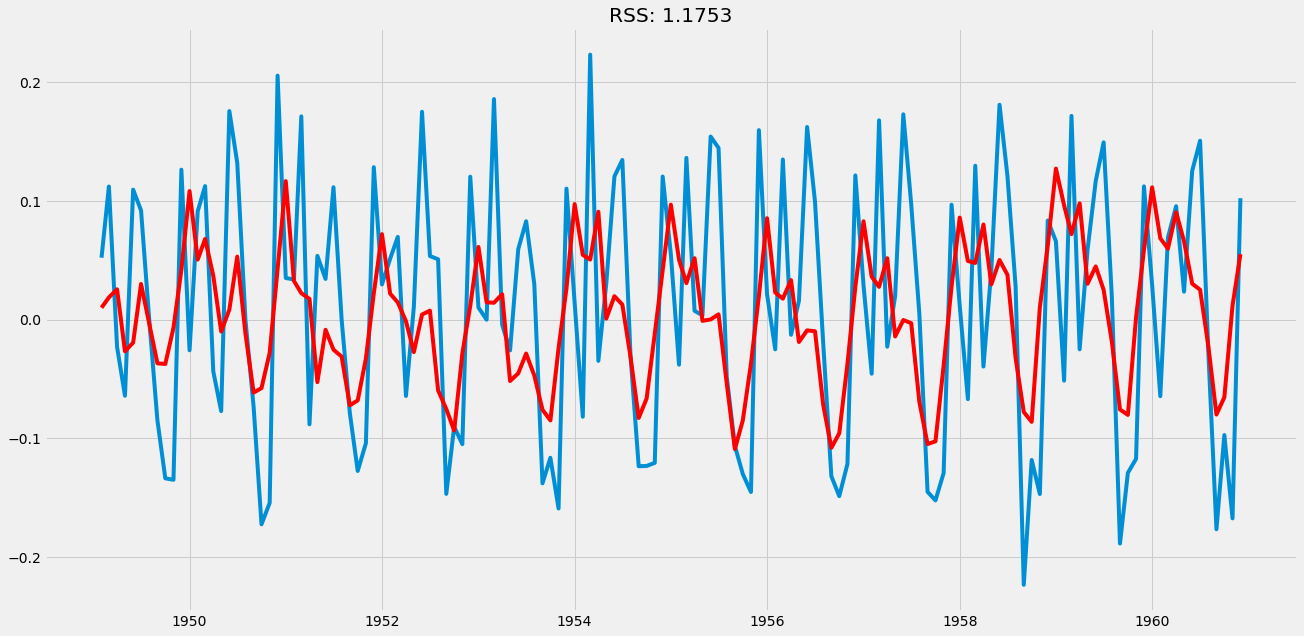

In [77]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

In [78]:
#Autoregressive Integrated Moving Average (ARIMA)

In [79]:
ts = y.passengers - y.passengers.shift()
ts.dropna(inplace=True)

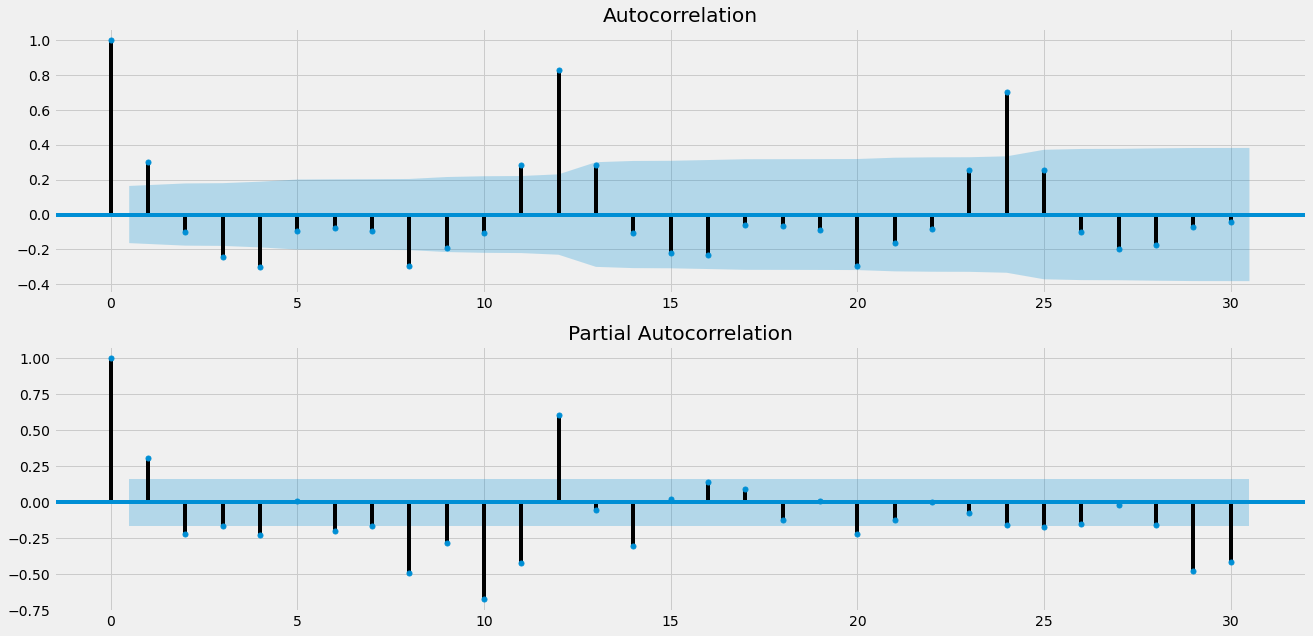

In [80]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(ts, ax=pyplot.gca(),lags=30)
pyplot.show()

In [81]:
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]

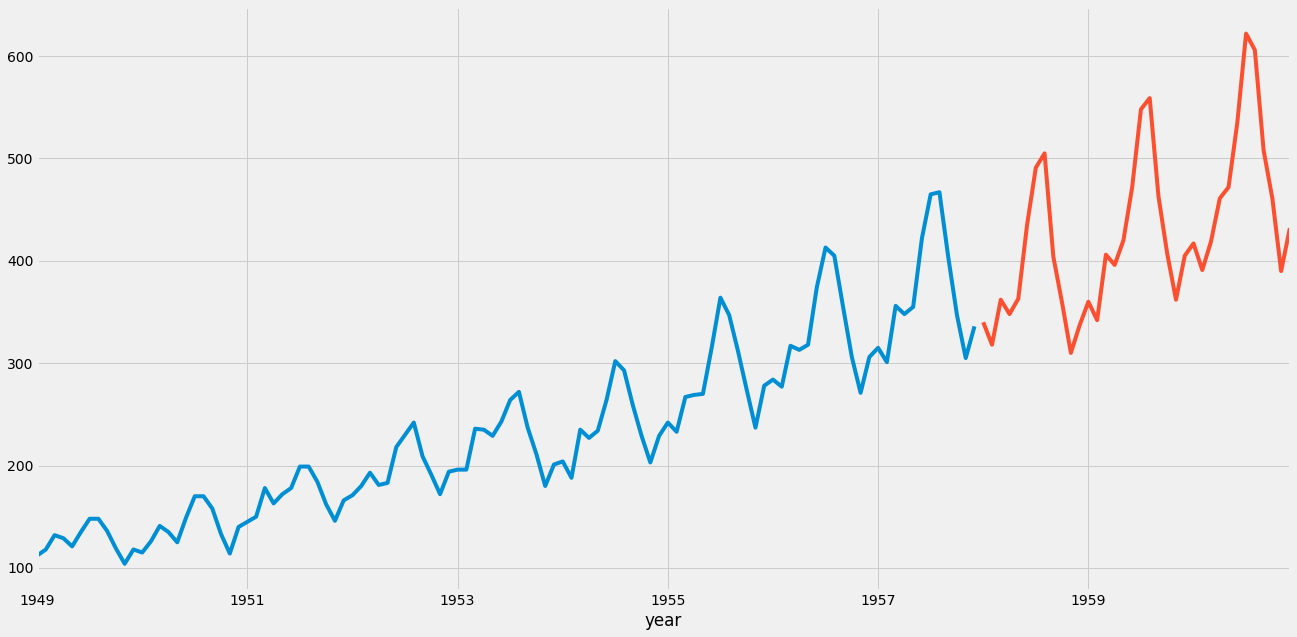

In [82]:
train['passengers'].plot()
valid['passengers'].plot()

In [83]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit(disp=1)

/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [84]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -493.230
Method:                       css-mle   S.D. of innovations             23.986
Date:                Thu, 02 Jul 2020   AIC                            994.461
Time:                        16:36:05   BIC                           1005.152
Sample:                    02-01-1949   HQIC                           998.795
                         - 12-01-1957                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4356      0.265      9.186      0.000       1.916       2.955
ar.L1.D.passengers     0.7409      0.067     10.991      0.000       0.609       0.873
ma.L1.D.passengers    -1.0000      0.025    -39.435      0.000      -1.050      -0.950
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3496           +0.0000j            1.3496            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [85]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)

In [86]:
# report performance
mse = mean_squared_error(y[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 432.6263796655409, MSE:187165.58438251278


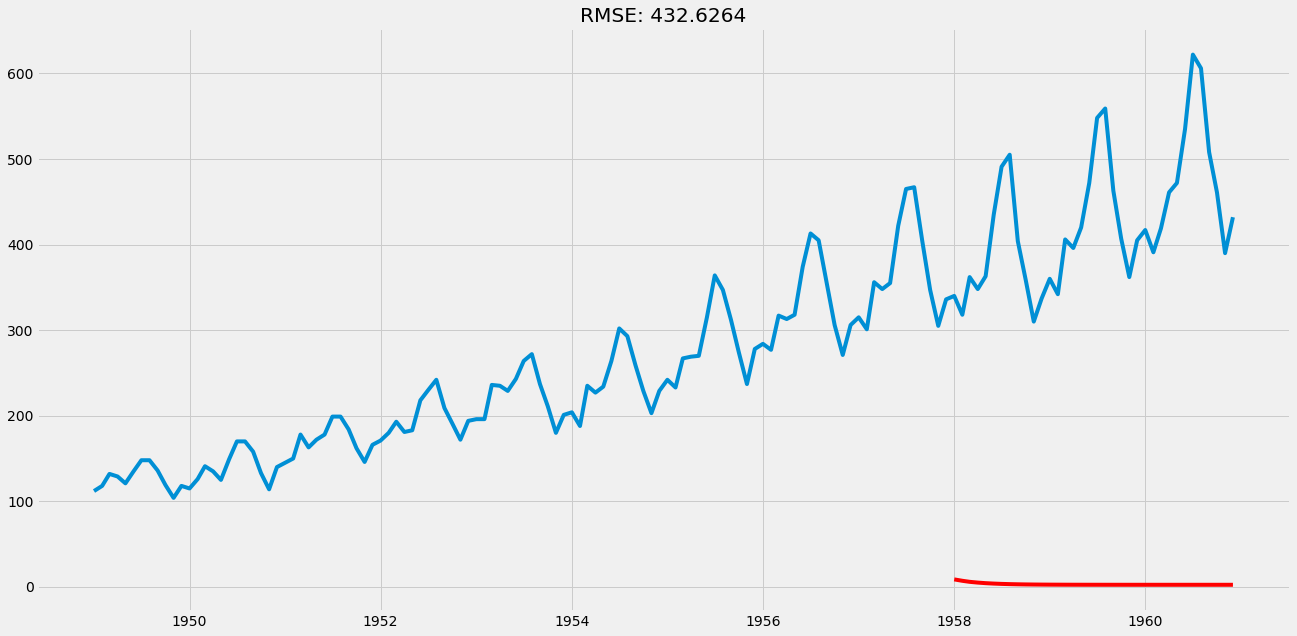

In [87]:
plt.plot(y.passengers)
plt.plot(predictions, color='red')
plt.title('RMSE: %.4f'% rmse)
plt.show()


In [88]:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
print (predictions_ARIMA_diff.head())

1958-01-01    8.743428
1958-02-01    7.109322
1958-03-01    5.898545
1958-04-01    5.001430
1958-05-01    4.336719
Freq: MS, dtype: float64


In [89]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

1958-01-01     8.743428
1958-02-01    15.852750
1958-03-01    21.751295
1958-04-01    26.752724
1958-05-01    31.089444
Freq: MS, dtype: float64


In [90]:
predictions_ARIMA_log = pd.Series(valid.passengers.iloc[0], index=valid.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

year
1958-01-01    348.743428
1958-02-01    355.852750
1958-03-01    361.751295
1958-04-01    366.752724
1958-05-01    371.089444
dtype: float64

Text(0.5, 1.0, 'RMSE: 205.2935')

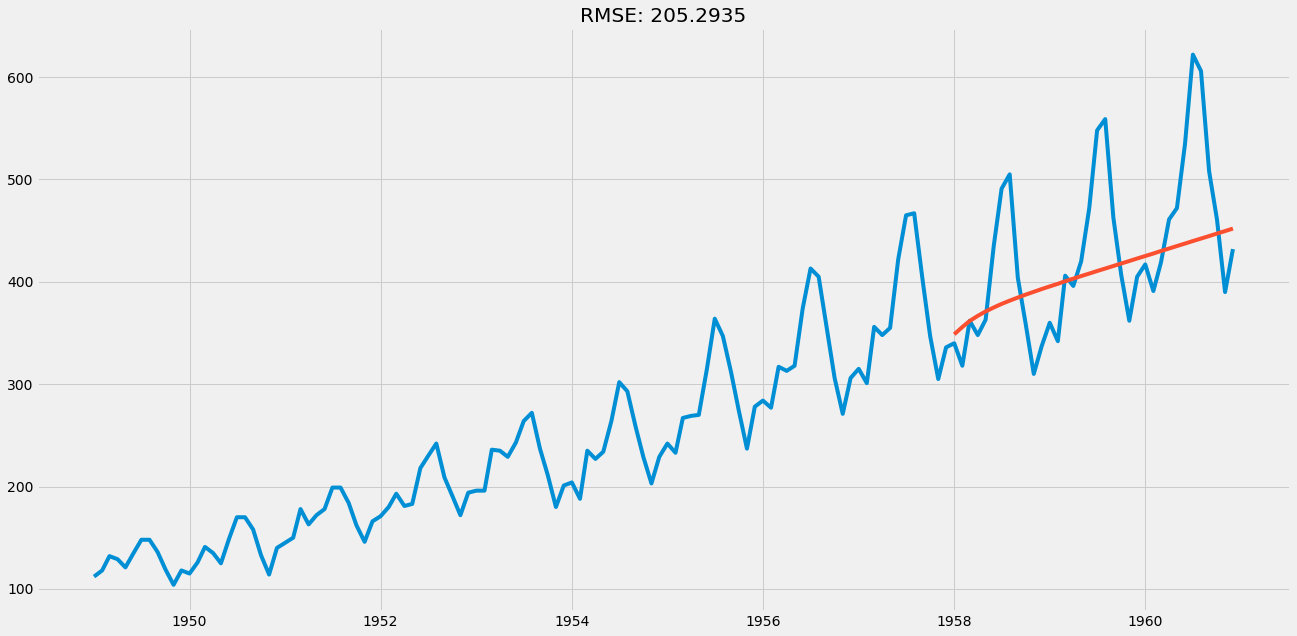

In [91]:
plt.plot(y.passengers)
plt.plot(predictions_ARIMA_log)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA_log-ts)**2)/len(ts)))

In [92]:
evaluate_forecast(y[start_index:end_index], predictions_ARIMA_log)


,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.179865,52.106955,36.843691,5017.836219,0.023691,NaN,70.836687


In [94]:
#building the model
from pmdarima import auto_arima

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=959.218, BIC=975.255, Time=0.305 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=1002.826, BIC=1008.172, Time=0.005 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=996.373, BIC=1004.392, Time=0.022 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=991.646, BIC=999.664, Time=0.034 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=1001.531, BIC=1004.204, Time=0.004 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=971.486, BIC=984.850, Time=0.117 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=969.040, BIC=982.405, Time=0.132 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit A

ARIMA(order=(3, 1, 3), suppress_warnings=True)

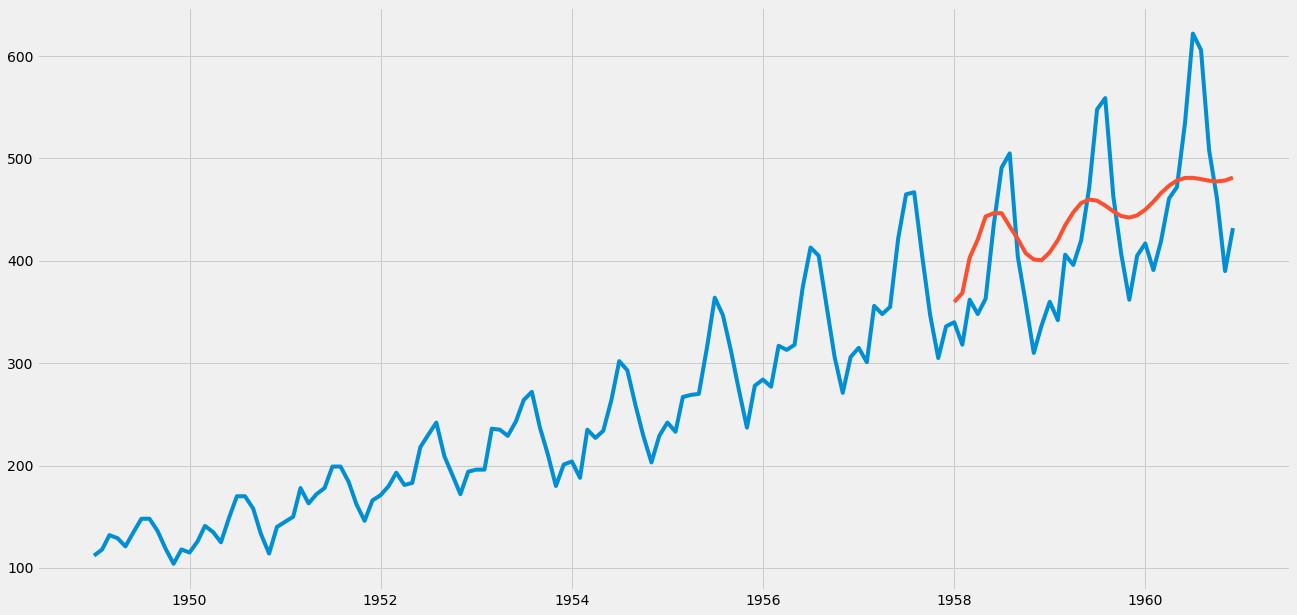

In [95]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y.passengers, label='Train')
#plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()


In [96]:
evaluate_forecast(valid, forecast)


,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.370489,52.899169,48.443947,3851.540919,0.019646,NaN,62.060784


In [97]:
#SARIMA

In [110]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
# it depends on how you have your data recorded,
#if each entry is a year,
#your seasonality would be 4,
#however if you have monthly data, then it would be 36.
model = SARIMAX(train, order=(3, 1, 3), seasonal_order=(1, 1, 1, 36))
model_fit = model.fit(disp=False)

/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [111]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)

In [112]:
# report performance
mse = mean_squared_error(y[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 29.886223492117576, MSE:893.1863546208004


Text(0.5, 1.0, 'RMSE: 29.8862')

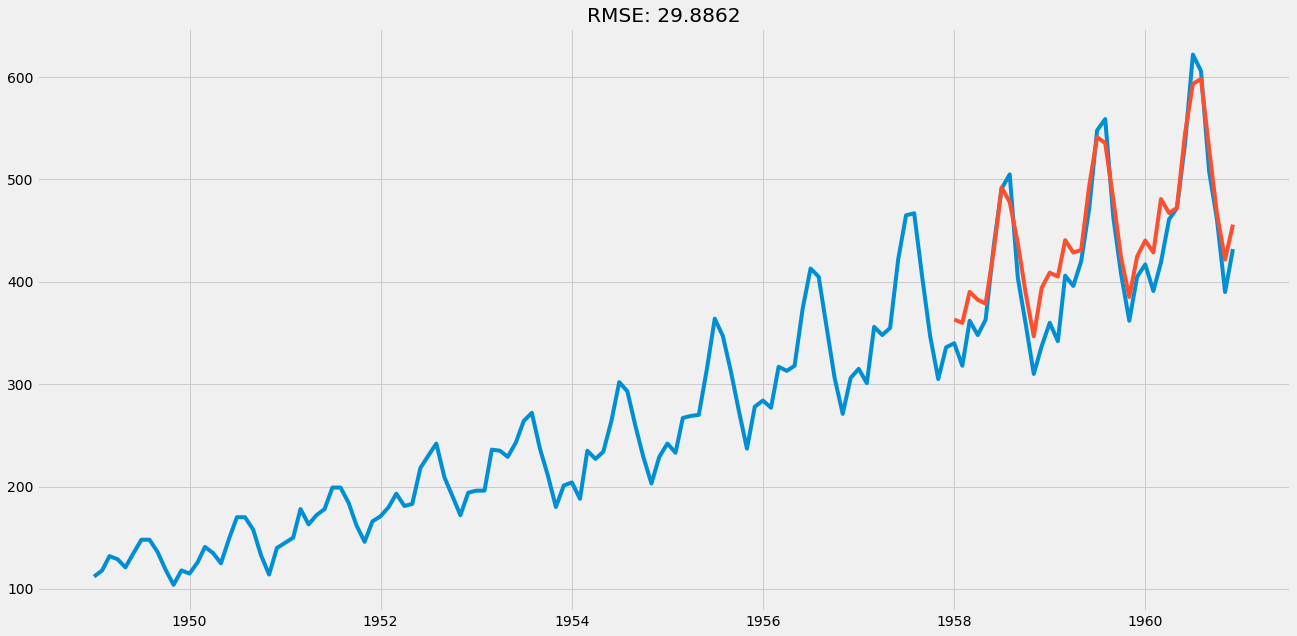

In [113]:
plt.plot(y)
plt.plot(predictions)
plt.title('RMSE: %.4f'% rmse)

In [114]:
predictions

1958-01-01    363.179983
1958-02-01    359.880630
1958-03-01    390.155899
1958-04-01    382.478228
1958-05-01    378.709516
1958-06-01    430.285395
1958-07-01    492.110576
1958-08-01    478.046369
1958-09-01    437.716719
1958-10-01    389.090821
1958-11-01    346.792111
1958-12-01    393.978739
1959-01-01    408.914003
1959-02-01    405.136807
1959-03-01    440.718898
1959-04-01    428.636796
1959-05-01    431.051543
1959-06-01    494.023936
1959-07-01    541.480001
1959-08-01    535.459277
1959-09-01    480.356805
1959-10-01    423.166650
1959-11-01    385.177827
1959-12-01    424.813664
1960-01-01    440.331536
1960-02-01    428.732159
1960-03-01    480.850686
1960-04-01    467.254541
1960-05-01    472.120937
1960-06-01    544.943637
1960-07-01    593.530490
1960-08-01    598.094211
1960-09-01    530.034581
1960-10-01    466.481097
1960-11-01    421.697857
1960-12-01    455.917438
Freq: MS, dtype: float64

In [115]:
evaluate_forecast(y[start_index:end_index], predictions)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.854014,25.32108,23.43613,893.186355,0.005664,NaN,29.886223


In [117]:
#Auto SARIMA

In [119]:
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=6, stepwise=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,6) [intercept=True]; AIC=936.762, BIC=958.145, Time=0.910 seconds
Fit ARIMA(0,1,0)x(0,0,0,6) [intercept=True]; AIC=1002.826, BIC=1008.172, Time=0.013 seconds
Fit ARIMA(1,1,0)x(1,0,0,6) [intercept=True]; AIC=997.166, BIC=1007.858, Time=0.140 seconds
Fit ARIMA(0,1,1)x(0,0,1,6) [intercept=True]; AIC=993.576, BIC=1004.268, Time=0.172 seconds
Fit ARIMA(0,1,0)x(0,0,0,6) [intercept=False]; AIC=1001.531, BIC=1004.204, Time=0.011 seconds
Fit ARIMA(2,1,2)x(0,0,1,6) [intercept=True]; AIC=956.753, BIC=975.463, Time=0.789 seconds
Fit ARIMA(2,1,2)x(1,0,0,6) [intercept=True]; AIC=974.515, BIC=993.225, Time=0.595 seconds
Near non-invertible roots for order (2, 1, 2)(1, 0, 0, 6); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(2,1,2)x(2,0,1,6) [intercept=True]; AIC=827.827, BIC=851.882, Time=2.143 seconds
Near non-invertible roots for order (2, 1, 2)(2, 0, 1, 6); setting score

ARIMA(order=(2, 1, 2), seasonal_order=(2, 0, 1, 6), suppress_warnings=True)

In [121]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
pred = model.predict()

In [122]:
pred = model.predict(n_periods=len(valid))
pred = pd.DataFrame(pred,index = valid.index,columns=['Prediction'])

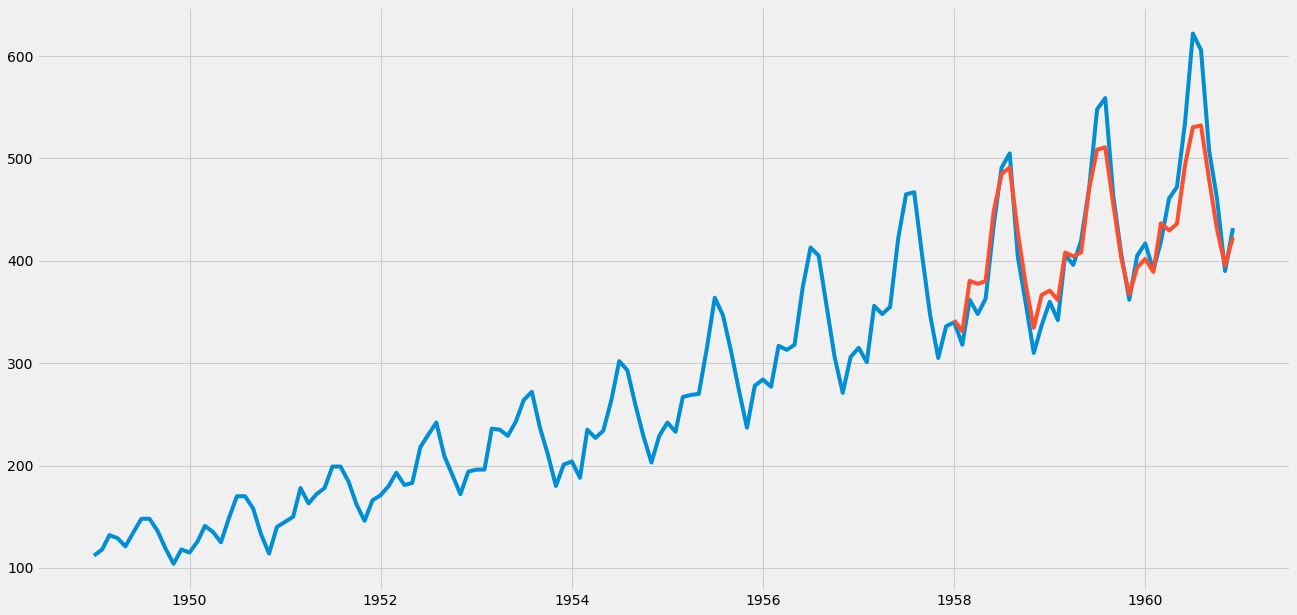

In [123]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y.passengers, label='Train')
#plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [124]:
evaluate_forecast(y[start_index:end_index], forecast)


,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.866239,21.141193,16.118388,818.392365,0.003465,NaN,28.607558


In [125]:
#TUNED SARIMA

In [126]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 1, 0, 6)
SARIMAX: (0, 1, 0) x (0, 1, 1, 6)
SARIMAX: (0, 1, 0) x (1, 0, 0, 6)


In [127]:
min_aic = 999999999
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            #Check for best model with lowest AIC
            if results.aic < min_aic:
                min_aic = results.aic
                min_aic_model = results
        except:
            continue

/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(0, 0, 0)x(0, 0, 0, 6)12 - AIC:1484.6772209911371
ARIMA(0, 0, 0)x(0, 0, 1, 6)12 - AIC:1332.708171707086
ARIMA(0, 0, 0)x(0, 1, 0, 6)12 - AIC:1106.9983169558561
ARIMA(0, 0, 0)x(0, 1, 1, 6)12 - AIC:1015.2677070067773
ARIMA(0, 0, 0)x(1, 0, 0, 6)12 - AIC:1115.9461051704866
ARIMA(0, 0, 0)x(1, 0, 1, 6)12 - AIC:1001.4755946445543


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(0, 0, 0)x(1, 1, 0, 6)12 - AIC:951.0958895418041
ARIMA(0, 0, 0)x(1, 1, 1, 6)12 - AIC:860.2555893602038
ARIMA(0, 0, 1)x(0, 0, 0, 6)12 - AIC:1334.2309362006279
ARIMA(0, 0, 1)x(0, 0, 1, 6)12 - AIC:1194.1257357113504
ARIMA(0, 0, 1)x(0, 1, 0, 6)12 - AIC:998.4912121257291
ARIMA(0, 0, 1)x(0, 1, 1, 6)12 - AIC:912.87806894588
ARIMA(0, 0, 1)x(1, 0, 0, 6)12 - AIC:1018.9733569616249


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(0, 0, 1)x(1, 0, 1, 6)12 - AIC:914.9884754574015
ARIMA(0, 0, 1)x(1, 1, 0, 6)12 - AIC:866.3727396781682
ARIMA(0, 0, 1)x(1, 1, 1, 6)12 - AIC:792.5520247086818


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(0, 1, 0)x(0, 0, 0, 6)12 - AIC:993.1312724630138
ARIMA(0, 1, 0)x(0, 0, 1, 6)12 - AIC:943.9245123024994
ARIMA(0, 1, 0)x(0, 1, 0, 6)12 - AIC:999.3755478803968
ARIMA(0, 1, 0)x(0, 1, 1, 6)12 - AIC:853.8944017377182
ARIMA(0, 1, 0)x(1, 0, 0, 6)12 - AIC:952.22563775069
ARIMA(0, 1, 0)x(1, 0, 1, 6)12 - AIC:904.2214150938219


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(0, 1, 0)x(1, 1, 0, 6)12 - AIC:706.8180283967731
ARIMA(0, 1, 0)x(1, 1, 1, 6)12 - AIC:700.9697603933248
ARIMA(0, 1, 1)x(0, 0, 0, 6)12 - AIC:973.2055693625967
ARIMA(0, 1, 1)x(0, 0, 1, 6)12 - AIC:924.7899877818189
ARIMA(0, 1, 1)x(0, 1, 0, 6)12 - AIC:979.0951064213244
ARIMA(0, 1, 1)x(0, 1, 1, 6)12 - AIC:837.3373300218577


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(0, 1, 1)x(1, 0, 0, 6)12 - AIC:941.4721477228292
ARIMA(0, 1, 1)x(1, 0, 1, 6)12 - AIC:886.8511031802192
ARIMA(0, 1, 1)x(1, 1, 0, 6)12 - AIC:698.3539185547687


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(0, 1, 1)x(1, 1, 1, 6)12 - AIC:682.4714093206097
ARIMA(1, 0, 0)x(0, 0, 0, 6)12 - AIC:1003.4820392779112
ARIMA(1, 0, 0)x(0, 0, 1, 6)12 - AIC:954.4289264537257
ARIMA(1, 0, 0)x(0, 1, 0, 6)12 - AIC:1001.199562233131


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum L

ARIMA(1, 0, 0)x(0, 1, 1, 6)12 - AIC:862.1556791545074
ARIMA(1, 0, 0)x(1, 0, 0, 6)12 - AIC:954.2184484398821
ARIMA(1, 0, 0)x(1, 0, 1, 6)12 - AIC:905.0278354935242
ARIMA(1, 0, 0)x(1, 1, 0, 6)12 - AIC:707.3904075301459


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(1, 0, 0)x(1, 1, 1, 6)12 - AIC:707.4979558719388
ARIMA(1, 0, 1)x(0, 0, 0, 6)12 - AIC:983.8745153729893
ARIMA(1, 0, 1)x(0, 0, 1, 6)12 - AIC:935.4867709792247
ARIMA(1, 0, 1)x(0, 1, 0, 6)12 - AIC:976.524200915972


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum L

ARIMA(1, 0, 1)x(0, 1, 1, 6)12 - AIC:844.8331735778168
ARIMA(1, 0, 1)x(1, 0, 0, 6)12 - AIC:943.5019392696873
ARIMA(1, 0, 1)x(1, 0, 1, 6)12 - AIC:884.0817229019829


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(1, 0, 1)x(1, 1, 0, 6)12 - AIC:700.1612840319407


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 6)12 - AIC:690.5229329056804
ARIMA(1, 1, 0)x(0, 0, 0, 6)12 - AIC:986.4207435070009
ARIMA(1, 1, 0)x(0, 0, 1, 6)12 - AIC:937.2676970229951
ARIMA(1, 1, 0)x(0, 1, 0, 6)12 - AIC:985.3821728074674
ARIMA(1, 1, 0)x(0, 1, 1, 6)12 - AIC:844.0590254404822
ARIMA(1, 1, 0)x(1, 0, 0, 6)12 - AIC:936.3388643486389


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(1, 1, 0)x(1, 0, 1, 6)12 - AIC:893.626886067314
ARIMA(1, 1, 0)x(1, 1, 0, 6)12 - AIC:692.553752220775
ARIMA(1, 1, 0)x(1, 1, 1, 6)12 - AIC:690.3400925845184


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(1, 1, 1)x(0, 0, 0, 6)12 - AIC:970.8380287106498
ARIMA(1, 1, 1)x(0, 0, 1, 6)12 - AIC:922.0887630236509
ARIMA(1, 1, 1)x(0, 1, 0, 6)12 - AIC:977.8777245169267


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No freq

ARIMA(1, 1, 1)x(0, 1, 1, 6)12 - AIC:840.621645067417
ARIMA(1, 1, 1)x(1, 0, 0, 6)12 - AIC:930.6378133665615


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 6)12 - AIC:886.2198394845847
ARIMA(1, 1, 1)x(1, 1, 0, 6)12 - AIC:693.0569052480482


/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sabin/Documents/sabin/nlp/nlp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 6)12 - AIC:684.3818335731102


In [128]:
min_aic_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        passengers   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -337.236
Date:                           Thu, 02 Jul 2020   AIC                            682.471
Time:                                   17:06:51   BIC                            692.602
Sample:                               01-01-1949   HQIC                           686.562
                                    - 12-01-1957                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4552      0.082     -5.543      0.000      -0.616      -0.294
ar.S.L6       -1.0894      0.017    -65.216      0.000      -1.122      -1.057
ma.S.L6        2.2736      0.600      3.791      0.000       1.098       3.449
sigma2        15.8260      7.949      1.991      0.046       0.247      31.405
===================================================================================
Ljung-Box (Q):                       45.44   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.26   Prob(JB):                         0.34
Heteroskedasticity (H):               0.61   Skew:                             0.37
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
pred = min_aic_model.get_prediction(start=start_index,end=end_index, dynamic=False)

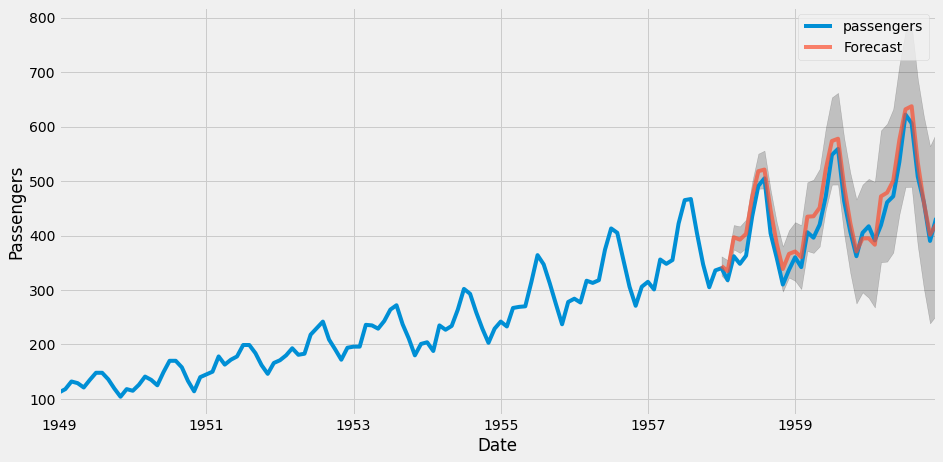

In [130]:
pred_ci = pred.conf_int()
ax = y['1949':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

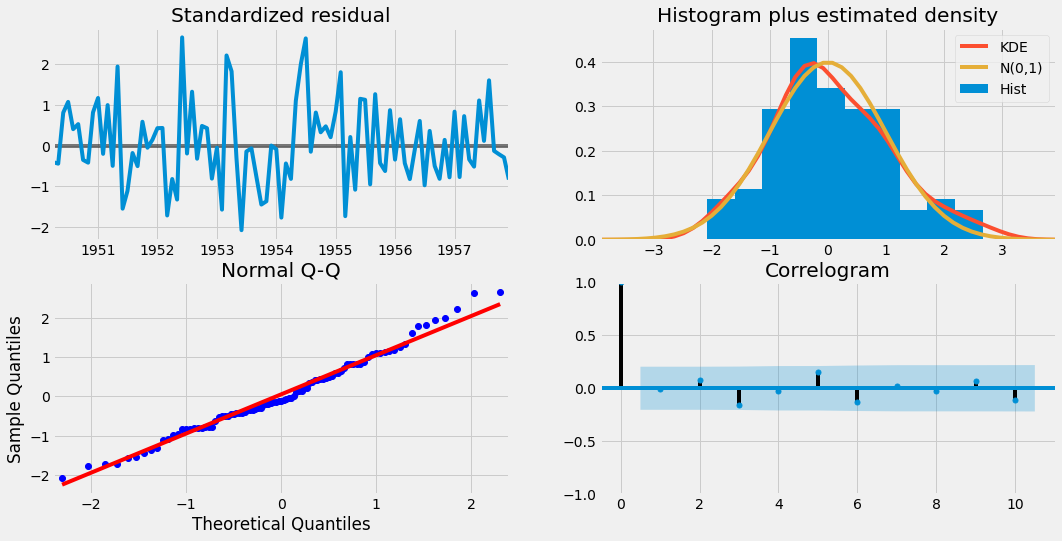

In [131]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [132]:
y_forecasted = pred.predicted_mean.values
y_truth = y[start_index:end_index].passengers.values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 781.5


In [133]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 27.96


In [134]:
evaluate_forecast(y_truth, y_forecasted)


,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.872268,24.733349,26.185187,781.501448,0.004216,5.932278,27.955347


In [135]:
#Prophet

In [136]:
train.head()


,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [137]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.passengers.values

In [138]:
train_prophet.head()


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [139]:
from fbprophet import Prophet

#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet( yearly_seasonality=True, seasonality_mode = 'multiplicative')
model.fit(train_prophet) #fit the model with your dataframe

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [144]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 36, freq = 'MS') 
future.tail()

,ds
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01
143,1960-12-01


In [141]:
forecast.columns


Index(['Prediction'], dtype='object')

In [142]:
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,1960-08-01,619.374869,601.418017,637.480414
140,1960-09-01,536.941726,520.612900,552.485990
141,1960-10-01,468.344793,452.560065,483.788391
142,1960-11-01,415.167783,400.186411,429.890857
143,1960-12-01,461.879328,445.888299,477.872212


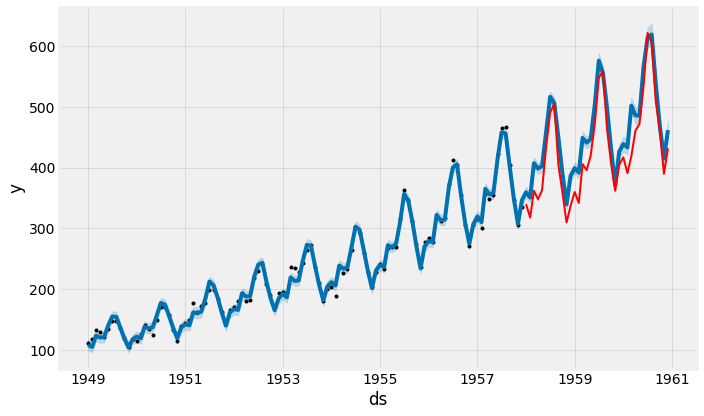

In [145]:
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

plt.show()

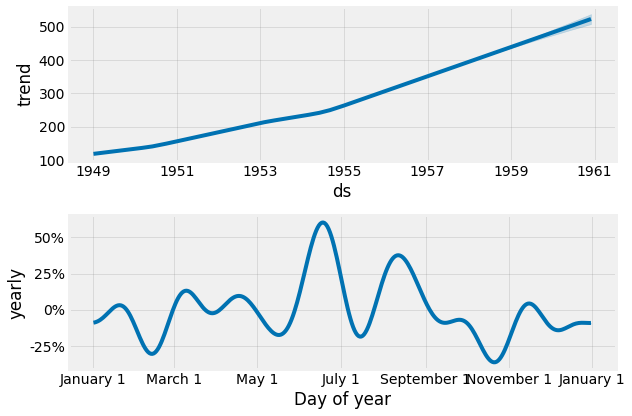

In [146]:
model.plot_components(forecast);


In [147]:
y_prophet = pd.DataFrame()
y_prophet['ds'] = y.index
y_prophet['y'] = y.passengers.values
y_prophet = y_prophet.set_index('ds')
forecast_prophet = forecast.set_index('ds')

In [148]:
evaluate_forecast(y_prophet.y[start_index:end_index], forecast_prophet.yhat[start_index:end_index])

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.809691,30.151156,29.277396,1164.367196,0.006817,7.554698,34.122825
